## Midterm Project: Scalable Database

## Monkeypox Detection:

### Team mates:
###  Kiran Songire
###  Mark DeCastro
###  Raj Kalsaria




In [1]:
#Installing Libraries

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [3]:
 pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Connecting SQL to python

In [5]:

import psycopg2
from tabulate import tabulate

con = psycopg2.connect(
    host="localhost",
    database="MonkeyDB",
    user="postgres",
    password="123456")


#cursor`
#For isolation: SERIALIZABLE
con.set_isolation_level(3)
con.autocommit = False


try:
        columns = ["patient_id", "systemic_illness", "rectal_pain", "sore_throat", "penile_odema", "oral_lesions", "solitary_lesion", "swollen_tonsils", "hiv_infection", "sexually_transmitted_infection", "monkeypox"]
        cur = con.cursor()
        query1 = "select * from additional_monkeydf"
        cur.execute(query1)
        product = cur.fetchall()
        print(tabulate(product, columns, "psql"))
        print("Print each row and it's columns values")
except (Exception, psycopg2.DatabaseError) as err:
    print(err)
    print("Transactions could not be completed so database will be rolled back before start of transactions")
    con.rollback()
finally:
    if con:
        con.commit()
        cur.close
        con.close
        print("PostgreSQL connection is now closed")

+--------------+----------------------+---------------+---------------+----------------+----------------+-------------------+-------------------+-----------------+----------------------------------+-------------+
|   patient_id | systemic_illness     | rectal_pain   | sore_throat   | penile_odema   | oral_lesions   | solitary_lesion   | swollen_tonsils   | hiv_infection   | sexually_transmitted_infection   | monkeypox   |
|--------------+----------------------+---------------+---------------+----------------+----------------+-------------------+-------------------+-----------------+----------------------------------+-------------|
|        25000 | Exhaustion           | True          | False         | True           | False          | True              | False             | True            | False                            | True        |
|        25001 | Respiratory Symptoms | True          | False         | True           | False          | True              | False             | Tr

In [6]:
#Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


In [8]:
monkey_df=pd.read_csv("C:/Users/kiran/OneDrive/Desktop/SQL/DATA.csv")

In [9]:
monkey_df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

### Renaming column name for dataset

In [10]:
rename_monkey=['patient_id','systemic_illness','rectal_pain', 'sore_throat',
       'penile_odema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection','monkeypox']

In [11]:
monkey_df.columns=rename_monkey

In [12]:
boole={False:0,True:1}
for i in range(2,len(monkey_df.columns)-1):
    monkey_df[monkey_df.columns[i]]=monkey_df[monkey_df.columns[i]].map(boole)
pos_neg={'Positive':1,"Negative":0}
monkey_df['monkeypox']=monkey_df['monkeypox'].map(pos_neg)

In [13]:
df = pd.DataFrame(data = product,columns = columns)

In [14]:
boole={'False':0,'True':1}
for i in range(2,len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].map(boole)

In [15]:
#Calculating if any null values in our csv-monkey_df dataset

In [16]:
monkey_df.isna().sum()

patient_id                        0
systemic_illness                  0
rectal_pain                       0
sore_throat                       0
penile_odema                      0
oral_lesions                      0
solitary_lesion                   0
swollen_tonsils                   0
hiv_infection                     0
sexually_transmitted_infection    0
monkeypox                         0
dtype: int64

In [17]:
df['monkeypox'].dtype

dtype('int64')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   patient_id                      14 non-null     int64 
 1   systemic_illness                14 non-null     object
 2   rectal_pain                     14 non-null     int64 
 3   sore_throat                     14 non-null     int64 
 4   penile_odema                    14 non-null     int64 
 5   oral_lesions                    14 non-null     int64 
 6   solitary_lesion                 14 non-null     int64 
 7   swollen_tonsils                 14 non-null     int64 
 8   hiv_infection                   14 non-null     int64 
 9   sexually_transmitted_infection  14 non-null     int64 
 10  monkeypox                       14 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.3+ KB


### Merging is done for monkey_df and df

In [19]:
monkey = monkey_df.append(df,ignore_index=True,sort=False)

C:\Users\kiran\AppData\Local\Temp\ipykernel_21880\108816879.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  monkey = monkey_df.append(df,ignore_index=True,sort=False)


In [21]:
monkey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25014 entries, 0 to 25013
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   patient_id                      25014 non-null  object
 1   systemic_illness                25014 non-null  object
 2   rectal_pain                     25014 non-null  int64 
 3   sore_throat                     25014 non-null  int64 
 4   penile_odema                    25014 non-null  int64 
 5   oral_lesions                    25014 non-null  int64 
 6   solitary_lesion                 25014 non-null  int64 
 7   swollen_tonsils                 25014 non-null  int64 
 8   hiv_infection                   25014 non-null  int64 
 9   sexually_transmitted_infection  25014 non-null  int64 
 10  monkeypox                       25014 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.1+ MB


In [22]:
print(type(monkey))

<class 'pandas.core.frame.DataFrame'>


### Convert dataframe to integer

In [23]:
def encode(column):
  col_unq=list(column.unique())
  try:
    ill={}
    for i in range(len(col_unq)):
        ill[f'{col_unq[i]}']=i
    column=column.map(ill)
    return column
  except:
    print('error')


In [24]:
monkey['systemic_illness']=encode(monkey['systemic_illness'])


In [25]:
monkey.tail()

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_odema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
25009,25009,5,1,0,1,0,1,0,1,0,0
25010,25010,6,1,0,1,0,1,0,1,0,1
25011,25011,6,1,0,1,1,0,0,1,0,1
25012,25012,6,1,0,1,1,0,0,1,0,1
25013,25013,6,1,0,1,1,0,0,1,0,1


### Calculating if any Null values in dataset

In [26]:
# dataset 1
df.isnull().sum()


patient_id                        0
systemic_illness                  0
rectal_pain                       0
sore_throat                       0
penile_odema                      0
oral_lesions                      0
solitary_lesion                   0
swollen_tonsils                   0
hiv_infection                     0
sexually_transmitted_infection    0
monkeypox                         0
dtype: int64

In [27]:
#dataset 2
monkey_df.isnull().sum()

patient_id                        0
systemic_illness                  0
rectal_pain                       0
sore_throat                       0
penile_odema                      0
oral_lesions                      0
solitary_lesion                   0
swollen_tonsils                   0
hiv_infection                     0
sexually_transmitted_infection    0
monkeypox                         0
dtype: int64

In [28]:
#dataset 3
monkey.isna().sum()

patient_id                        0
systemic_illness                  0
rectal_pain                       0
sore_throat                       0
penile_odema                      0
oral_lesions                      0
solitary_lesion                   0
swollen_tonsils                   0
hiv_infection                     0
sexually_transmitted_infection    0
monkeypox                         0
dtype: int64

In [29]:
drop_index=list(monkey[monkey['monkeypox']==1][-6820:].index)

In [30]:
len(drop_index)

6820

In [31]:
monkey.drop(drop_index,inplace=True)

In [32]:
np.count_nonzero(monkey['monkeypox']==0)

9097

In [33]:
np.count_nonzero(monkey['monkeypox']==1)

9097

array([[<AxesSubplot:title={'center':'systemic_illness'}>,
        <AxesSubplot:title={'center':'rectal_pain'}>,
        <AxesSubplot:title={'center':'sore_throat'}>],
       [<AxesSubplot:title={'center':'penile_odema'}>,
        <AxesSubplot:title={'center':'oral_lesions'}>,
        <AxesSubplot:title={'center':'solitary_lesion'}>],
       [<AxesSubplot:title={'center':'swollen_tonsils'}>,
        <AxesSubplot:title={'center':'hiv_infection'}>,
        <AxesSubplot:title={'center':'sexually_transmitted_infection'}>],
       [<AxesSubplot:title={'center':'monkeypox'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

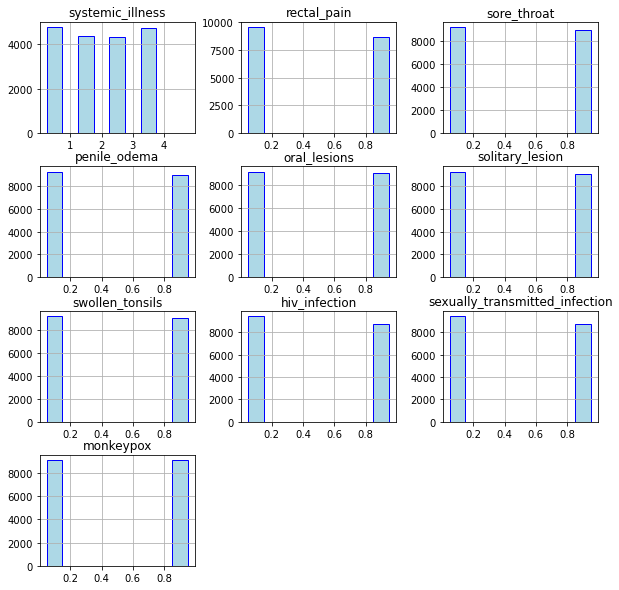

In [34]:
monkey.hist(figsize=(10,10),bins = 5, rwidth=0.5, color= "lightblue", ec="blue")

In [35]:
monkey.columns

Index(['patient_id', 'systemic_illness', 'rectal_pain', 'sore_throat',
       'penile_odema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection', 'monkeypox'],
      dtype='object')

In [36]:
monkey.head()

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_odema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
0,P0,0,0,1,1,1,0,1,0,0,0
1,P1,1,1,0,1,1,0,0,1,0,1
2,P2,1,0,1,1,0,0,0,1,0,1
3,P3,0,1,0,0,0,1,1,1,0,1
4,P4,2,1,1,1,0,0,1,1,0,1


### For Our dataset we are not dropping the duplicates.

### Plotting Boxplot for Outliers

In [37]:
print(type(monkey))

<class 'pandas.core.frame.DataFrame'>


In [38]:
monkey.columns

Index(['patient_id', 'systemic_illness', 'rectal_pain', 'sore_throat',
       'penile_odema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection', 'monkeypox'],
      dtype='object')

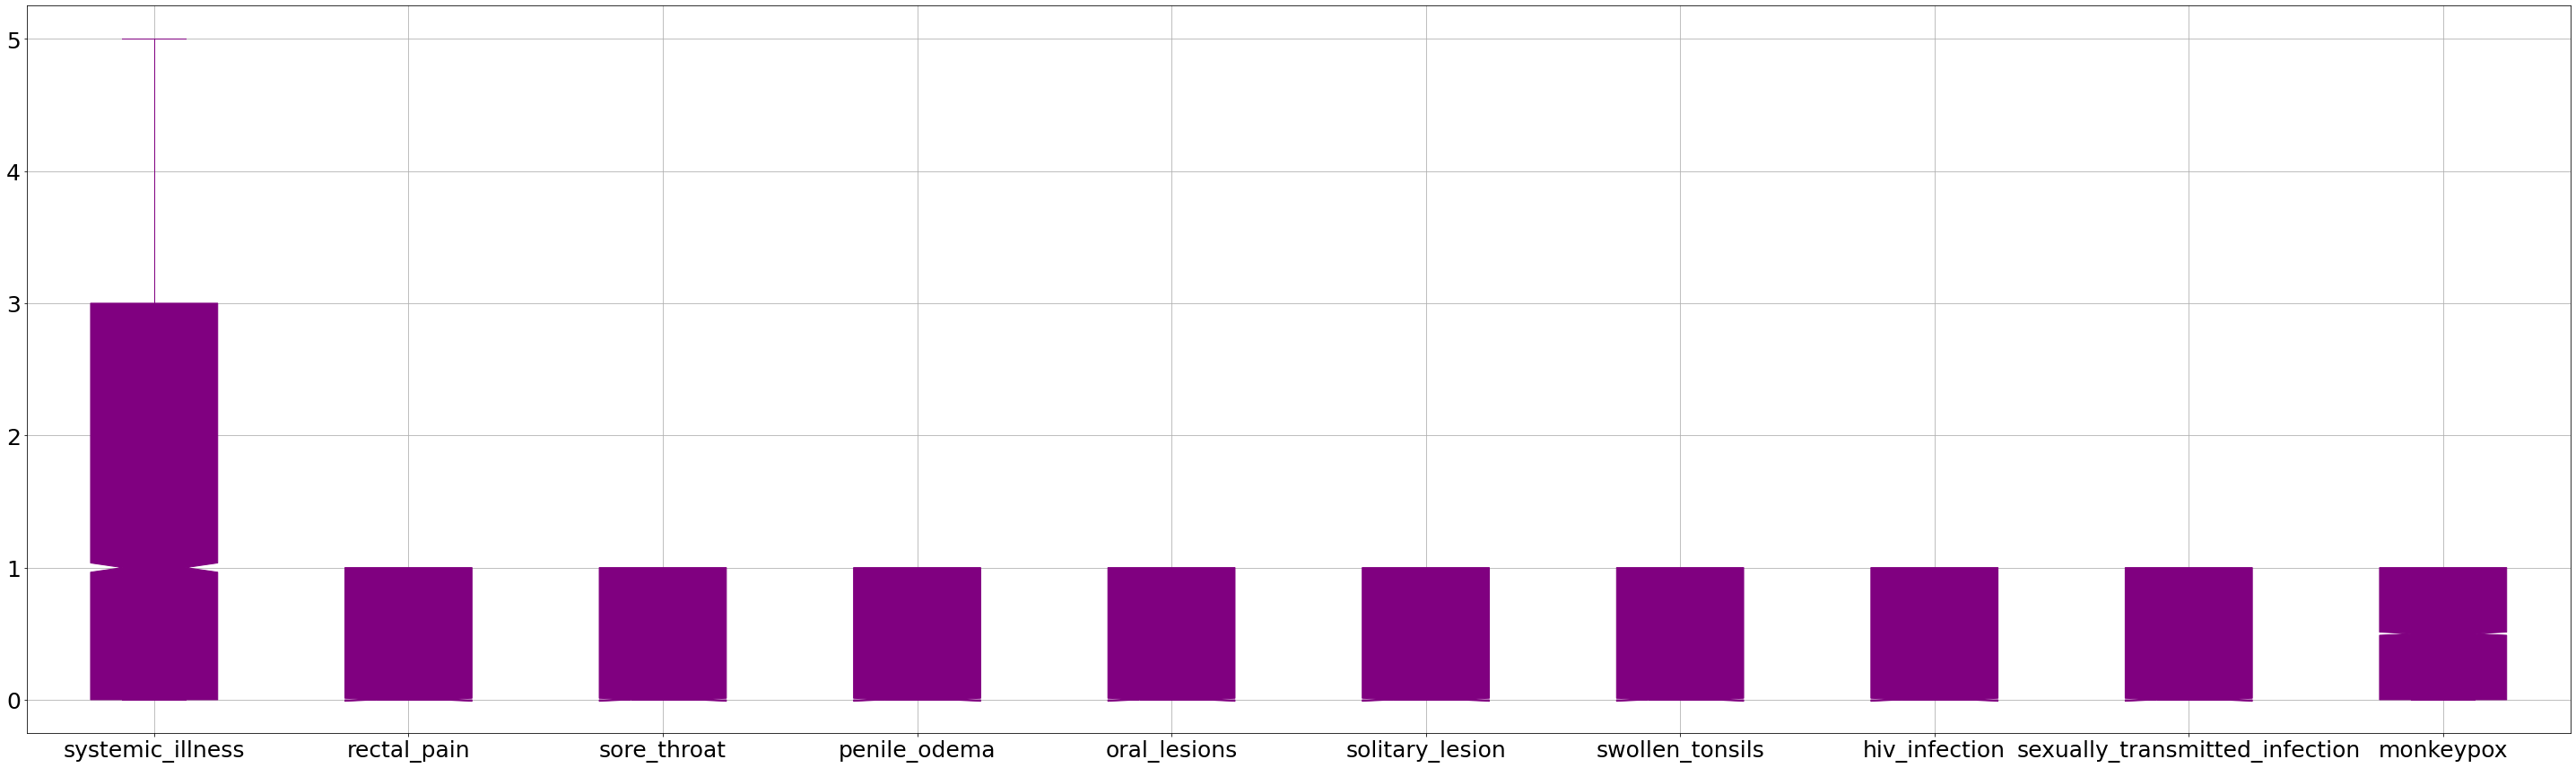

In [39]:
c = "purple"
boxplot = monkey.boxplot(column=['systemic_illness', 'rectal_pain', 'sore_throat',
       'penile_odema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection', 'monkeypox'],figsize=(40,12),fontsize=25, color=dict(boxes=c, whiskers=c, medians=c, caps=c), notch=True, patch_artist=True)
plt.tight_layout(h_pad = 1.5)

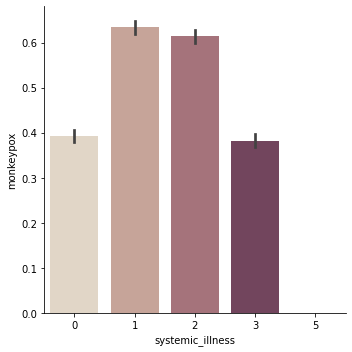

In [40]:
sns.catplot(data=monkey, x="systemic_illness", y="monkeypox", kind="bar", palette="ch:.25")

<Figure size 432x288 with 0 Axes>

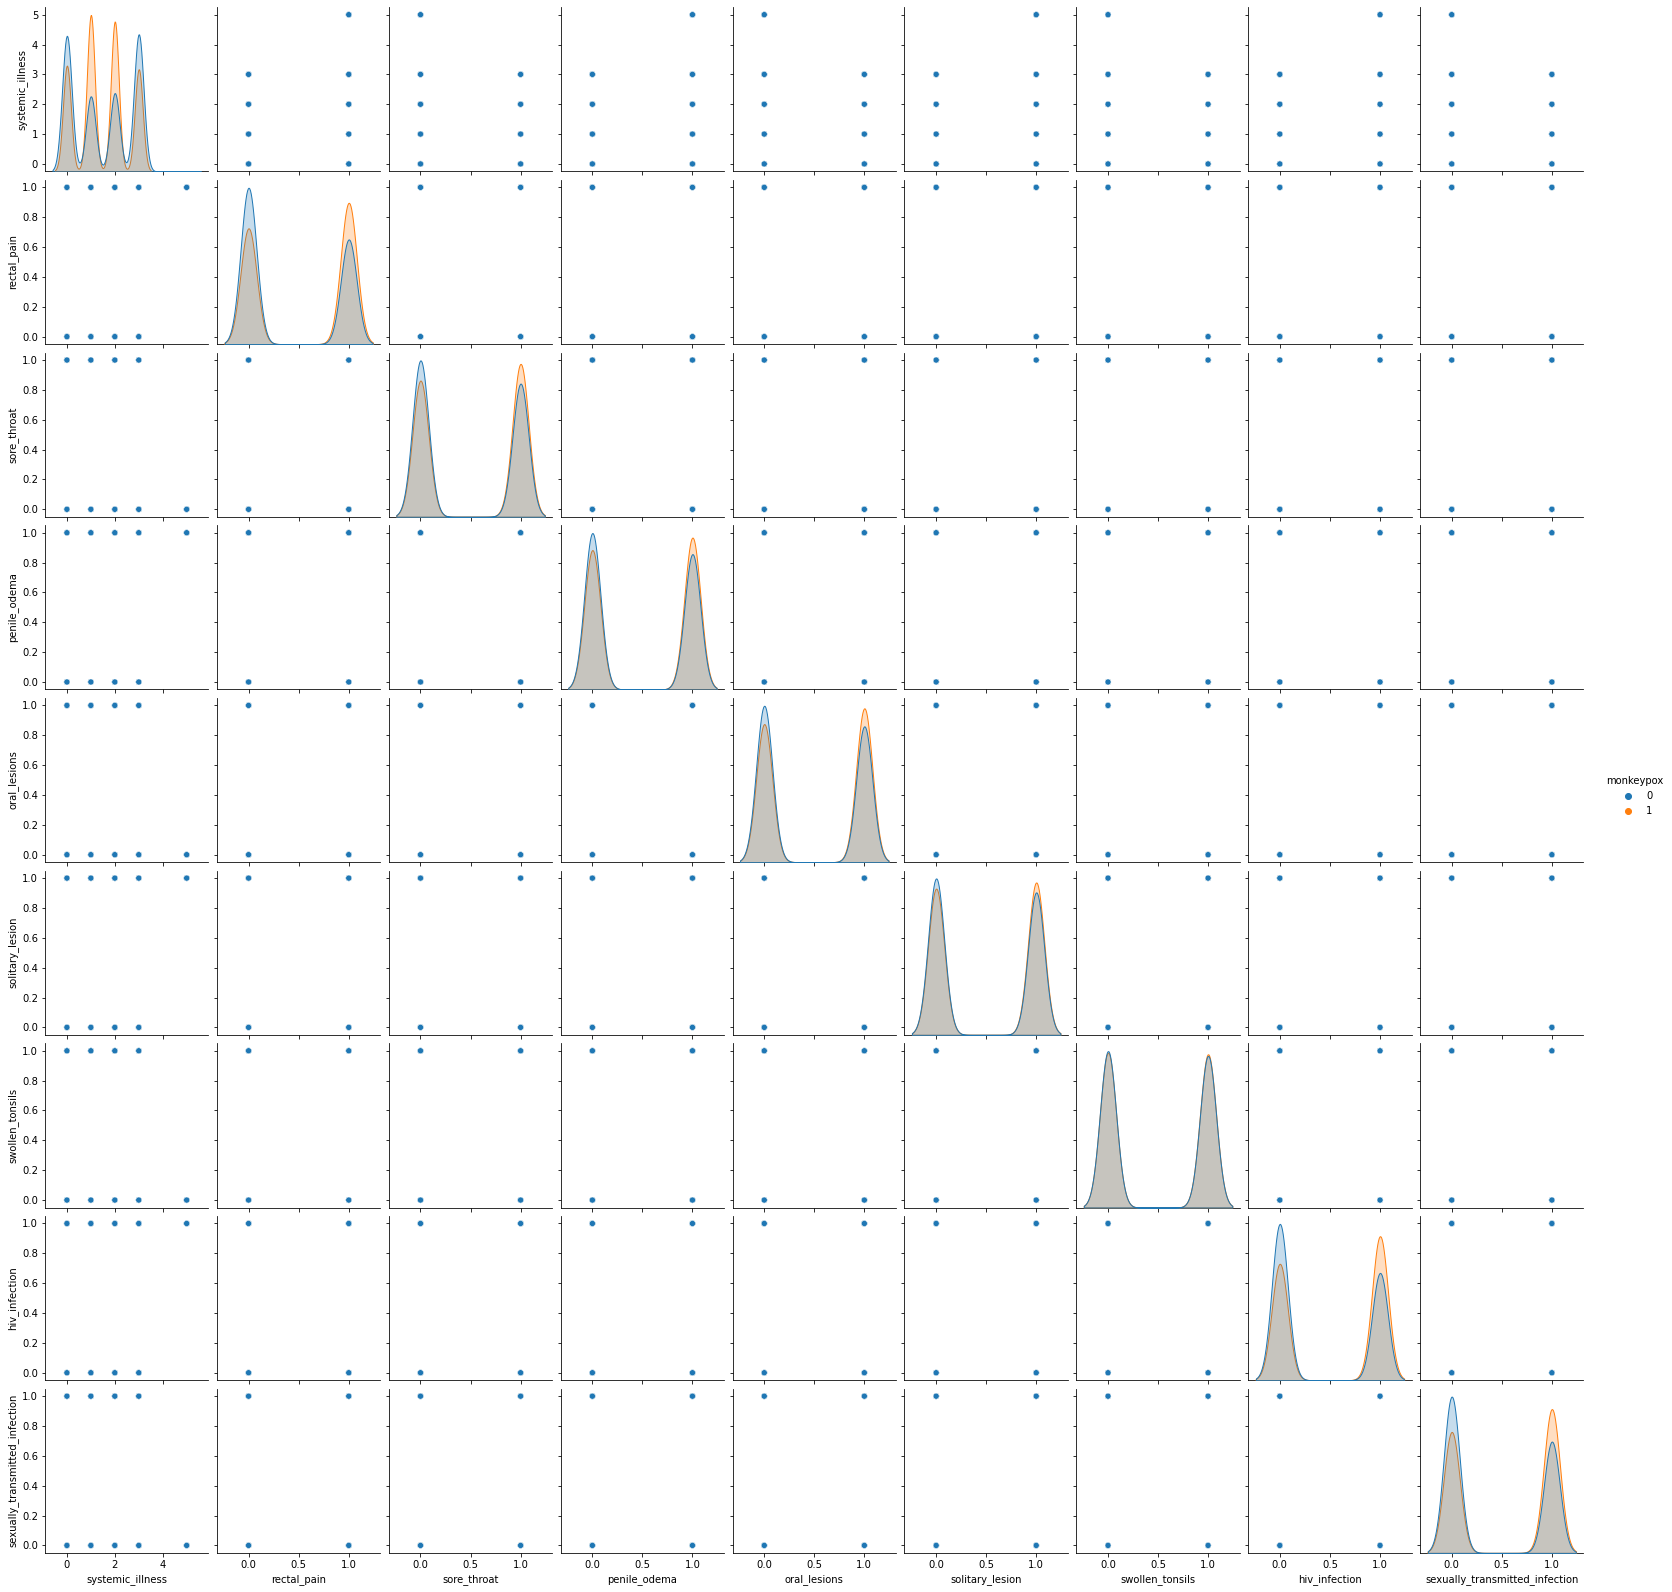

In [41]:
plt.figure()
sns.pairplot(monkey, hue ='monkeypox')
plt.show()

In [42]:
#Also use of correlation as EDA and Mathematical function

<AxesSubplot:>

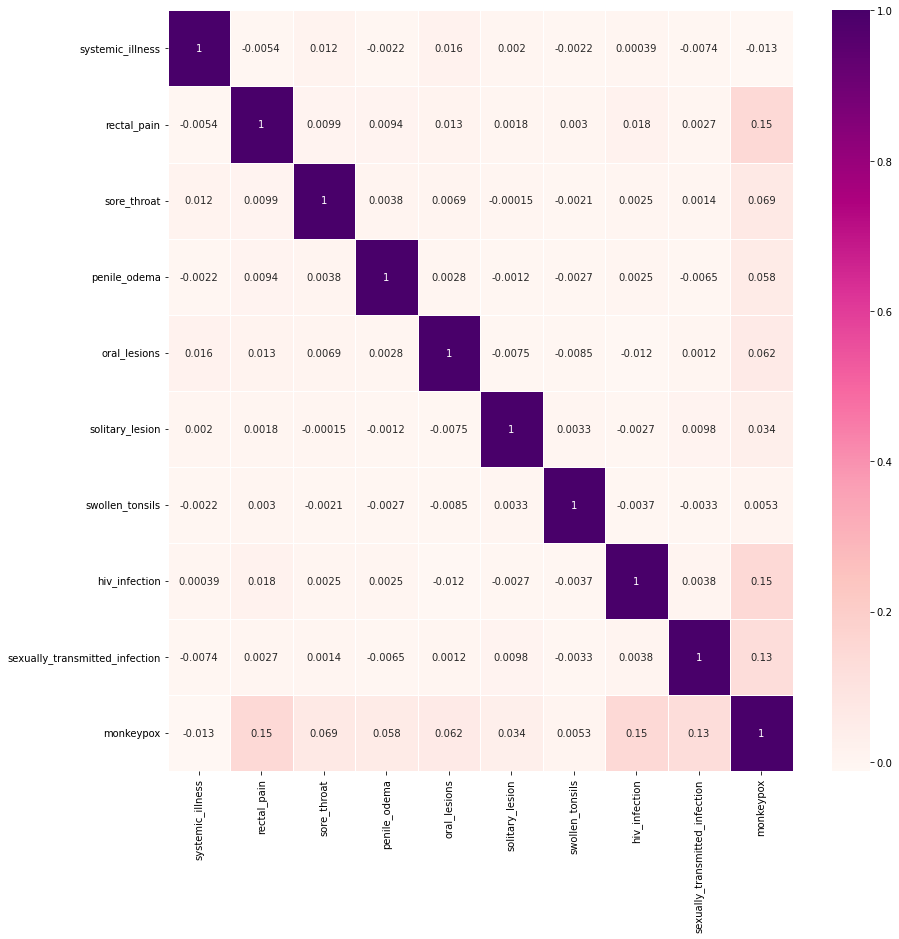

In [43]:
monkey_corr = monkey.corr()
plt.figure(figsize=(14,14))
sns.heatmap(monkey_corr, linewidth =1, cmap = 'RdPu', annot=True)

* The correlation matrix states that:
* The monkeypox is highly correalated with hiv_infection and rectal_pain.

### Slicing

In [44]:
monkey.iloc[:,::-2]

,monkeypox,hiv_infection,solitary_lesion,penile_odema,rectal_pain,patient_id
0,0,0,0,1,0,P0
1,1,1,0,1,1,P1
2,1,1,0,1,0,P2
3,1,1,1,0,1,P3
4,1,1,0,1,1,P4
...,...,...,...,...,...,...
25003,0,1,1,1,1,25003
25004,0,1,1,1,1,25004
25006,0,1,1,1,1,25006
25008,0,1,1,1,1,25008


In [45]:
#Slicing data
monkey[["patient_id", "monkeypox"]]

,patient_id,monkeypox
0,P0,0
1,P1,1
2,P2,1
3,P3,1
4,P4,1
...,...,...
25003,25003,0
25004,25004,0
25006,25006,0
25008,25008,0


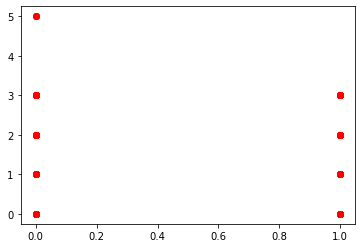

In [46]:

plt.scatter(monkey["monkeypox"],monkey["systemic_illness"], c='red', alpha=0.5)
plt.show()

### Conditions and data segregation, 

In [47]:
monkey.loc[(monkey['systemic_illness']==3)&(monkey['monkeypox']==1)]

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_odema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
8,P8,3,0,1,1,1,0,0,0,0,1
39,P39,3,1,0,1,0,0,1,0,0,1
40,P40,3,0,1,1,1,1,1,0,0,1
46,P46,3,1,0,0,0,1,1,0,0,1
47,P47,3,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14229,P14229,3,0,0,0,0,1,0,1,1,1
14232,P14232,3,1,0,1,1,0,1,1,1,1
14234,P14234,3,1,1,1,1,1,1,0,0,1
14235,P14235,3,0,1,1,1,1,1,1,0,1


## Matrix Form of dataset

In [48]:
#Matrix of Dataframe
monkey_matrix = np.matrix(monkey)
monkey_matrix

matrix([['P0', 0, 0, ..., 0, 0, 0],
        ['P1', 1, 1, ..., 1, 0, 1],
        ['P2', 1, 0, ..., 1, 0, 1],
        ...,
        [25006, 5, 1, ..., 1, 0, 0],
        [25008, 5, 1, ..., 1, 0, 0],
        [25009, 5, 1, ..., 1, 0, 0]], dtype=object)

In [49]:
#Subsetting data
monkey[monkey.systemic_illness == 3]

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_odema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
8,P8,3,0,1,1,1,0,0,0,0,1
10,P10,3,0,1,1,1,1,1,0,1,0
18,P18,3,0,1,1,0,0,0,0,0,0
25,P25,3,1,1,1,0,0,0,0,1,0
26,P26,3,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24979,P24979,3,0,0,0,1,0,1,1,0,0
24981,P24981,3,0,1,0,0,1,1,1,0,0
24983,P24983,3,0,1,1,1,0,0,1,1,0
24988,P24988,3,1,1,0,0,0,0,1,0,0


### Data to numpy Python

In [50]:
import csv
import numpy as np
 
with open('monkey.csv', 'r') as f:
    data = list(csv.reader(f, delimiter=","))
    data = np.array(data)
    print(data)

[['patient_id' 'systemic_illness' 'rectal_pain' ... 'hiv_infection'
  'sexually_transmitted_infection' 'monkeypox']
 ['P0' '0' '0' ... '0' '0' '0']
 ['P1' '1' '1' ... '1' '0' '1']
 ...
 ['25011' '6' '1' ... '1' '0' '1']
 ['25012' '6' '1' ... '1' '0' '1']
 ['25013' '6' '1' ... '1' '0' '1']]


 ###  Use conditions and segregate the data based on the condition

In [51]:
remarkable_filter = (monkey['penile_odema'] == True) | (monkey['oral_lesions'] == True)
print(remarkable_filter)

0         True
1         True
2         True
3        False
4         True
         ...  
25003     True
25004     True
25006     True
25008     True
25009     True
Length: 18194, dtype: bool


### Use of * Arg and **Kwargs

In [52]:
def access_all(*args, **kwargs):
    print("args: ", args)
    print("kwargs: ", kwargs) 
# Now we can use both *args ,**kwargs
# to pass arguments to this function :
access_all(monkey['patient_id'], monkey['monkeypox'])

args:  (0           P0
1           P1
2           P2
3           P3
4           P4
         ...  
25003    25003
25004    25004
25006    25006
25008    25008
25009    25009
Name: patient_id, Length: 18194, dtype: object, 0        0
1        1
2        1
3        1
4        1
        ..
25003    0
25004    0
25006    0
25008    0
25009    0
Name: monkeypox, Length: 18194, dtype: int64)
kwargs:  {}


In [53]:
class sample():
    def __init__(self,*args):
        self.patient_id = args[0]
        self.rectal_pain = args[1]
        self.swollen_tonsils = args[1]
        self.hiv_infection = args[1]
        self.monkeypox = args[1]

object1=sample(monkey['patient_id'], monkey['rectal_pain'], monkey['swollen_tonsils'], monkey['hiv_infection'], monkey['monkeypox'])


print([object1.patient_id], [object1.rectal_pain], [object1.swollen_tonsils], [object1.hiv_infection], [object1.monkeypox])


[0           P0
1           P1
2           P2
3           P3
4           P4
         ...  
25003    25003
25004    25004
25006    25006
25008    25008
25009    25009
Name: patient_id, Length: 18194, dtype: object] [0        0
1        1
2        0
3        1
4        1
        ..
25003    1
25004    1
25006    1
25008    1
25009    1
Name: rectal_pain, Length: 18194, dtype: int64] [0        0
1        1
2        0
3        1
4        1
        ..
25003    1
25004    1
25006    1
25008    1
25009    1
Name: rectal_pain, Length: 18194, dtype: int64] [0        0
1        1
2        0
3        1
4        1
        ..
25003    1
25004    1
25006    1
25008    1
25009    1
Name: rectal_pain, Length: 18194, dtype: int64] [0        0
1        1
2        0
3        1
4        1
        ..
25003    1
25004    1
25006    1
25008    1
25009    1
Name: rectal_pain, Length: 18194, dtype: int64]


In [54]:
# manipulate data to showcase new column with conditional statement

In [55]:
monkey['hasimage'] = np.where(monkey['monkeypox'] == 1, True, False)
monkey.head()

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_odema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox,hasimage
0,P0,0,0,1,1,1,0,1,0,0,0,False
1,P1,1,1,0,1,1,0,0,1,0,1,True
2,P2,1,0,1,1,0,0,0,1,0,1,True
3,P3,0,1,0,0,0,1,1,1,0,1,True
4,P4,2,1,1,1,0,0,1,1,0,1,True


In [56]:
image_tweets = monkey[monkey['hasimage'] == True]
no_image_tweets = monkey[monkey['hasimage'] == False]

In [57]:
print(monkey['monkeypox'].head(), monkey['hasimage'].head())

0    0
1    1
2    1
3    1
4    1
Name: monkeypox, dtype: int64 0    False
1     True
2     True
3     True
4     True
Name: hasimage, dtype: bool


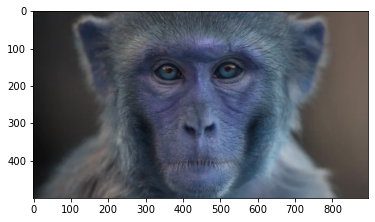

In [58]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread("C:/Users/kiran/OneDrive/Desktop/SQL/Image.jpeg")
plt.imshow(image1)
plt.show()


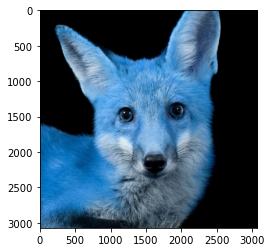

In [59]:
image2 = cv2.imread("C:/Users/kiran/OneDrive/Desktop/SQL/Notmonkey.jpeg")
plt.imshow(image2)
plt.show()

In [72]:
#Performing some cv2 operations on image of case 1

In [73]:
img1_size = image1.shape
img1_size

(500, 896, 3)

In [74]:
img1_size = image2.shape
img1_size

(3072, 3072, 3)

In [76]:
# concating images using numpy
concate_img = np.concatenate((imagepositive, imageNegative),axis=1)


In [75]:
imagepositive = cv2.resize(image1, dsize=(120,120))
imageNegative = cv2.resize(image2, dsize=(120,120))

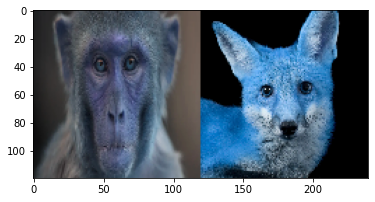

In [77]:
plt.imshow(concate_img)

In [60]:
A1 = monkey[(monkey.hiv_infection==1)&(monkey.rectal_pain==1)].iloc[:,-2]

In [61]:
A2 = monkey[(monkey.hiv_infection==0)&(monkey.rectal_pain==0)].iloc[:,-2]

In [62]:
positive1 = np.count_nonzero(A1)

In [63]:
negative1 = np.count_nonzero(A2)

<AxesSubplot:xlabel='monkeypox', ylabel='hiv_infection'>

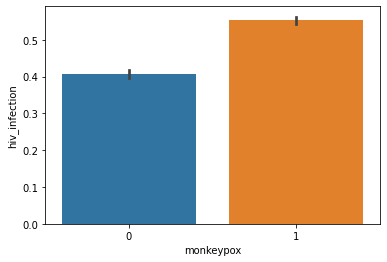

In [64]:
sns.barplot(x= monkey.monkeypox, y=monkey.hiv_infection, data=monkey)

<AxesSubplot:xlabel='monkeypox', ylabel='rectal_pain'>

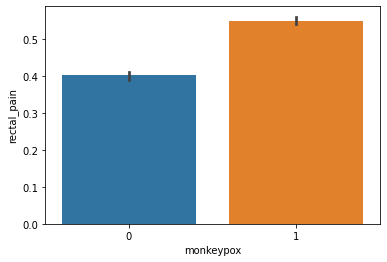

In [65]:
sns.barplot(x="monkeypox", y="rectal_pain", data=monkey)

In [66]:
B1 = monkey[(monkey.swollen_tonsils==1)&(monkey.solitary_lesion==0)].iloc[:,-2]
B2 = monkey[(monkey.swollen_tonsils==0)&(monkey.solitary_lesion==1)].iloc[:,-2]

In [67]:
positive2 = np.count_nonzero(B1)
negative2 = np.count_nonzero(B2)

In [68]:
def case1():
    if positive1 > negative1:
        plt.imshow(image1)
        plt.show()
    else:
        plt.imshow(image2)
        plt.show()

In [69]:
def case2():
    if positive2 > negative2:
        plt.imshow(image1)
        plt.show()
    else:
        plt.imshow(image2)
        plt.show()

### PATIENT A

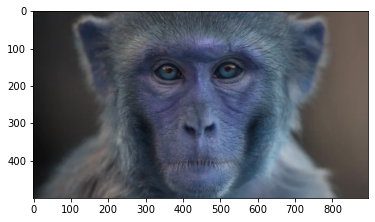

In [83]:
case1()

### PATIENT B

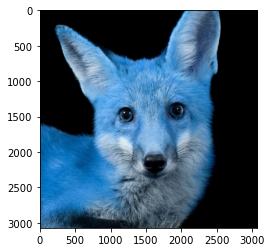

In [84]:
case2()

***************************************************************************************************************************